In [303]:
import pandas as pd
mta_2019=pd.read_csv("/Users/dengcg1992/ds/metis/MTA-Project/2019_mta_counts.csv")
mta_2019=mta_2019[mta_2019["day_count"]<50000]
mta_2020=pd.read_csv("/Users/dengcg1992/ds/metis/MTA-Project/2020_mta_counts.csv")
mta_2020=mta_2020[mta_2020["day_count"]<50000]
covid_df=pd.read_csv("/Users/dengcg1992/ds/metis/MTA-Project/covid_curated.csv")
mta_covid=pd.read_csv("/Users/dengcg1992/ds/metis/MTA-Project/mta_and_covid.csv")

In [304]:
def to_datetime(df):
    df['date'] = pd.to_datetime(df['date'], format='%Y/%m/%d')
to_datetime(mta_2019)
to_datetime(mta_2020)
pre_by_day_df=mta_2019.groupby(["date"]).day_count.sum()[5:].reset_index()
post_by_day_df=mta_2020.groupby(["date"]).day_count.sum()[:72].reset_index()
post_by_day_df.date = pre_by_day_df.date

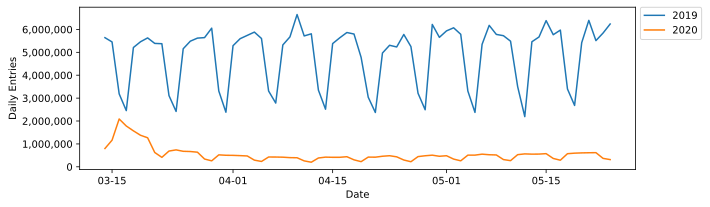

In [305]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%config InlineBackend.figure_format = 'svg'
fig = plt.figure()
ax = fig.add_subplot(111)
fig.set_size_inches(10,3)#fig(figsize=(10,3))
ax.plot(pre_by_day_df.date,pre_by_day_df['day_count'],label="2019")
ax.plot(post_by_day_df.date,post_by_day_df['day_count'],label="2020")
ax.set_xlabel('Date')
ax.set_ylabel('Daily Entries')#,fontsize = 20, weight = 'bold',color='green')
ax.legend(bbox_to_anchor=(1, 0.83, 0.3, 0.2),loc='upper left')
#fig.suptitle('2019 vs 2020 Train Rides', fontsize=20)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%m-%d"))
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
fig = ax.get_figure()
fig.savefig('/Users/dengcg1992/ds/metis/MTA-Project/train rides.png',bbox_inches='tight')

- Train ride drops significantly from 2019 to 2020.
- Train ride was decreasing from March 15 to April 1, and then it became stable
- There was a huge difference between weekend and weekday's traffic in 2019's data. It is minial in 2020. 

In [306]:
#understand the most populous stations before/after Covid 19
post_entries_by_station=mta_2020.groupby(["station"]).day_count.sum().reset_index().sort_values(["day_count"],ascending=False)
pre_entries_by_station=mta_2019.groupby(["station"]).day_count.sum().reset_index().sort_values(["day_count"],ascending=False)
post_most_traffic=[]
pre_most_traffic=[]
post_most_traffic= [row["station"] for index, row in post_entries_by_station[:10].iterrows()]
pre_most_traffic= [row["station"] for index, row in pre_entries_by_station[:10].iterrows()]
pre_box_plot_df=mta_2019[(mta_2019['station'].isin(pre_most_traffic))][['station','day_count']]
post_box_plot_df=mta_2020[mta_2020['station'].isin(post_most_traffic)][['station','day_count']]



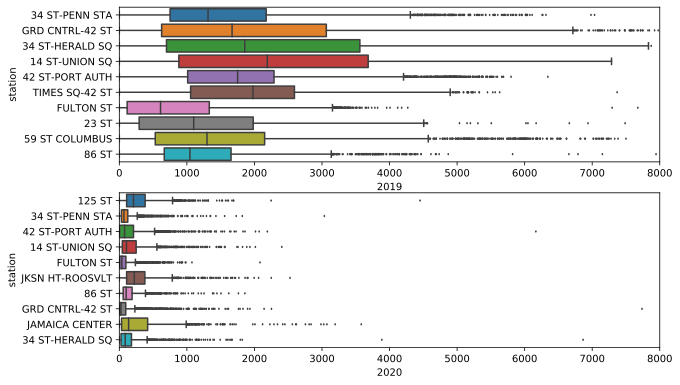

In [307]:
import seaborn as sns
a4_dims = (9.7, 6.27)
f, axes = plt.subplots(2,1,figsize=a4_dims)
flierprops = dict(markerfacecolor='0.75', markersize=1,
              linestyle='none')
ax1=sns.boxplot(x=pre_box_plot_df["day_count"],y=pre_box_plot_df["station"],order=pre_most_traffic, ax=axes[0],flierprops=flierprops)
ax1.set(xlim=(0, 8000))
ax1.set(xlabel='2019')
ax2=sns.boxplot(x=post_box_plot_df["day_count"],y=post_box_plot_df["station"],order=post_most_traffic, ax=axes[1],flierprops=flierprops)
ax2.set(xlim=(0, 8000))
ax2.set(xlabel='2020')
#ax1.set_title('Daily Train Rides for Top 10 Stations',fontsize=20)

f.savefig('/Users/dengcg1992/ds/metis/MTA-Project/boxplot.png',bbox_inches='tight')

- Train rides drop significantly from 2019 to 2020
- The train rides vary significantly from day to day
- The most populous stations in 2019 stays populous after Covid-19

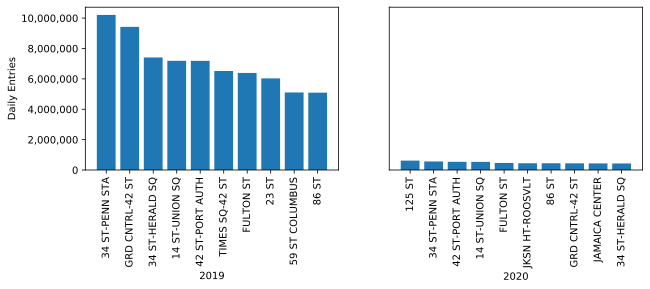

In [308]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))
x=[i for i in range(0,10)]
ax1.bar(x, pre_entries_by_station.head(10)["day_count"], align='center')
ax1.set_xticks(range(0,10))
ax1.set_xticklabels(pre_most_traffic,rotation=90)
ax1.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.set_xlabel('2019')
ax1.set_ylabel('Daily Entries')

ax2.bar(x, post_entries_by_station.head(10)["day_count"], align='center')
ax2.set_xticks(range(0,10))
ax2.set_xticklabels(post_most_traffic,rotation=90)
ax2.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax2.set_ylim([0, 12000000])
ax2.get_yaxis().set_visible(False)
ax2.set_xlabel('2020')
#fig.suptitle('Daily Entries for Top 10 Stations', fontsize=20)
fig.savefig('/Users/dengcg1992/ds/metis/MTA-Project/histogram.png',bbox_inches='tight')

Alternative for boxplots:
- Train rides drop significantly from 2019 to 2020
- The most populous stations in 2019 stays populous after Covid-19

In [309]:
post_by_day_df2=mta_2020.groupby(["date"]).day_count.sum()[17:65].reset_index()
covid_by_day=covid_df.groupby(["datetime"]).daily_new.sum().reset_index()
d = {'datetime': ["2020-04-01","2020-04-02","2020-04-06"], 'daily_new': [float("NaN"),float("NaN"),float("NaN")]}
add_date=pd.DataFrame(data=d)
covid_by_day=pd.concat([covid_by_day, add_date]).sort_values(['datetime']).reset_index()
covid_by_day['datetime'] = pd.to_datetime(covid_by_day['datetime'], format='%Y/%m/%d')


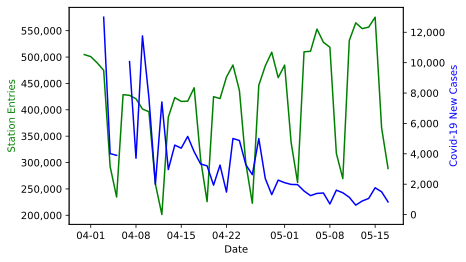

In [310]:
fig, ax1 = plt.subplots()
date=[row[1] for row in post_by_day_df2.itertuples()]
ax2 = ax1.twinx()
ax1.plot(date, post_by_day_df2["day_count"], 'g-')
ax2.plot(date,covid_by_day['daily_new'], 'b-')
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%m-%d"))
ax1.set_xlabel('Date')
ax1.set_ylabel('Station Entries', color='g')
ax2.set_ylabel('Covid-19 New Cases', color='b')
ax1.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax2.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
#fig.suptitle('Station Daily Entries vs Covid-19 New Cases', fontsize=20)
fig.savefig('/Users/dengcg1992/ds/metis/MTA-Project/covid_station.png',bbox_inches='tight')

- Train rides increased and daily new cases decreased. It indicates that as New York recovered from pandemic, more people start to take MTA trains again. 
- There is no evidence showing that more train rides contribute to the spread of Covid-19 virus. 

In [311]:
pd.set_option('display.max_rows', 500)
covid_station_heat_df=mta_covid.groupby(["station"]).day_cases.sum().reset_index().sort_values(["day_cases"],ascending=False)
covid_station_heat_df=covid_station_heat_df.set_index(["station"])
post_entries_by_station2=post_entries_by_station.set_index(["station"])

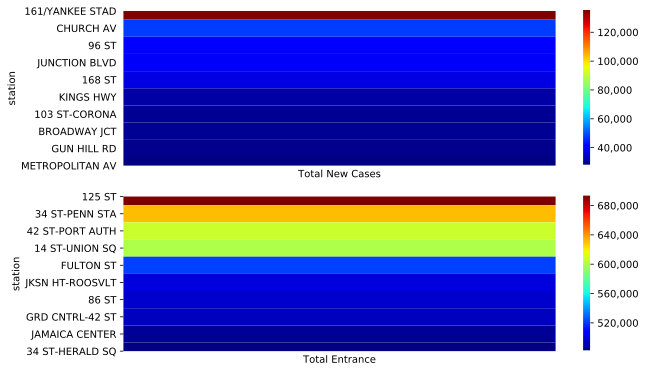

In [325]:
a4_dims = (9.7, 6.27)
f, axes = plt.subplots(2,1,figsize=a4_dims)
from matplotlib.ticker import FuncFormatter
comma_fmt = FuncFormatter(lambda x, p: format(int(x), ','))
ax1=sns.heatmap(covid_station_heat_df[:10],cmap='jet',annot=False,ax=axes[0],xticklabels="",cbar_kws={'format':comma_fmt})
ax2=sns.heatmap(post_entries_by_station2[:10],cmap='jet',annot=False,ax=axes[1],xticklabels="",cbar_kws={'format':comma_fmt})
ax1.set_xlabel('Total New Cases')
ax2.set_xlabel('Total Entrance')
ax1.tick_params(left=False, bottom=False)
f.savefig('/Users/dengcg1992/ds/metis/MTA-Project/heat_map.png',bbox_inches='tight')

There is no overlap between stations with the most traffic and the stations with the most new cases. 

In [326]:
mta_covid

,Unnamed: 0,unit,scp,station,linename,date,entries,day_entries,zipcode,positive,day_cases
0,0,r003,00-00-00,CYPRESS HILLS,J,2020-03-31,625201,100.0,11208,350,NaN
1,1,r003,00-00-01,CYPRESS HILLS,J,2020-03-31,1974157,56.0,11208,350,NaN
2,2,r003,00-00-02,CYPRESS HILLS,J,2020-03-31,4874451,105.0,11208,350,NaN
3,3,r200,00-00-00,EUCLID AV,AC,2020-03-31,1172470,291.0,11208,350,NaN
4,4,r200,00-00-01,EUCLID AV,AC,2020-03-31,6243919,581.0,11208,350,NaN
...,...,...,...,...,...,...,...,...,...,...,...
156380,156380,r463,00-06-06,CANAL ST,JNQRZ6W,2020-05-17,102766562,12.0,10013,245,0.0
156381,156381,r463,00-06-07,CANAL ST,JNQRZ6W,2020-05-17,4943536,8.0,10013,245,0.0
156382,156382,r463,00-06-07,CANAL ST,JNQRZ6W,2020-05-17,4943536,8.0,10013,245,0.0
156383,156383,r463,00-06-08,CANAL ST,JNQRZ6W,2020-05-17,1691542,13.0,10013,245,0.0


In [346]:
mta_covid_by_zip=mta_covid.groupby("zipcode")[["day_entries","day_cases"]].agg({"day_entries":'mean',"day_cases":'mean'})
mta_covid_by_zip=mta_covid_by_zip[mta_covid_by_zip.index!=11232]

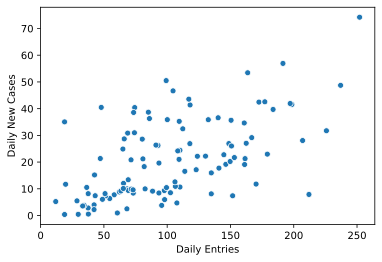

In [349]:
ax = sns.scatterplot(x="day_entries", y="day_cases",data=mta_covid_by_zip)
ax.set_xlabel('Daily Entries')
ax.set_ylabel('Daily New Cases')
fig = ax.get_figure()
fig.savefig('/Users/dengcg1992/ds/metis/MTA-Project/scatter plot.png',bbox_inches='tight')